<a href="https://colab.research.google.com/github/Wishmiii/Colombo-Travel-Route-Optimizer/blob/main/MathCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Optimizing travel routes and costs
#Bus and taxi
# Most efficient and cost effective
# Consider distance and traffic delay factors
#and
# Predict peak hours and optimize service shedules using mathematical models

In [2]:
import sympy as sp # For symbolic mathematics
import numpy as np # For numeric mathematics
import matplotlib.pyplot as plt # For plotting

#Question 1

##Part a

The function for Bus travel time:


$$
T_b(x,y) = ax^2 +by^2
$$


The function for Taxi travel time:
$$
T_t(x,y) = \sqrt{c(x^2+y^2)}
$$

In [26]:
sp.init_printing()

#Define variables
x,y = sp.symbols('x y',real=True)
a,b,c = sp.symbols('a b c',positive=True)

#------------------------Bus Travel Time Model-------------------

#Bus travel time function
T_b = a*x**2 + b*y**2

#Computing partial differetiation
T_b_x = sp.diff(T_b, x)
T_b_y = sp.diff(T_b, y)

# Gradient for Bus Travel Time
gradient_T_bus = sp.Matrix([T_b_x, T_b_y])
print("Gradient of Bus Travel Time Model = \n")
sp.pprint(gradient_T_bus)


#------------------------Taxi Travel Time Model-------------------

#Taxi travel time function
T_t = sp.sqrt(c*(x**2 + y**2))

#Computing partial differetiation
T_t_x = sp.diff(T_t, x)
T_t_y = sp.diff(T_t, y)

# Gradient for Taxi Travel Time
gradient_T_taxi = sp.Matrix([T_t_x, T_t_y])
print("\n\nGradient of Bus Travel Time Model = \n")
sp.pprint(gradient_T_taxi)




Gradient of Bus Travel Time Model = 

⎡2⋅a⋅x⎤
⎢     ⎥
⎣2⋅b⋅y⎦


Gradient of Bus Travel Time Model = 

⎡    √c⋅x    ⎤
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎢╲╱  x  + y  ⎥
⎢            ⎥
⎢    √c⋅y    ⎥
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎣╲╱  x  + y  ⎦


In [27]:
x,y,a,b,p,c = sp.symbols('x y a b p c', positive=True)

#Bus model

gradiant_T_bus = (sp.diff(T_b, x),sp.diff(T_b, y))

#Taxi model
T_t = p*sp.sqrt(c*(x**2 + y**2))
gradient_T_taxi = (sp.diff(T_t, x), sp.diff(T_t, y))

print("Gradient for bus travel time = ",gradiant_T_bus)
print("Gradient for bus travel time = ",gradient_T_taxi)



Gradient for bus travel time =  (0, 0)
Gradient for bus travel time =  (sqrt(c)*p*x/sqrt(x**2 + y**2), sqrt(c)*p*y/sqrt(x**2 + y**2))


##Part c - Interpretation

#Question 2 - Cost Analysis Using Integration

Fare Rate Functions ( cost per km)


Bus:

$$
F_b(x) = ∫_0^x (2t+1) dt
$$


Taxi:

$$
F_t(x) = ∫_0^x (3t+2) dt
$$

where:



*   t  =  distance travelled (km)
*   integrand = incremental cost per km







##Part a

In [28]:
#Define variables
t = sp.symbols('t',real=True, nonnegative=True)

#------------------------Bus Travel Time Model-------------------

#Bus fare rate function
F_b = 2*t + 1

#Integrating
tot_fare_bus = sp.integrate(F_b, (t,0,x))

print("Bus Fare =\n")
sp.pprint(tot_fare_bus)

#------------------------Taxi Travel Time Model-------------------

#Taxi fare rate function
F_t = 3*t + 2

#Integrating
tot_fare_taxi = sp.integrate(F_t, (t,0,x))

print("\n\nTaxi Fare =")
sp.pprint(tot_fare_taxi)



Bus Fare =

 2    
x  + x


Taxi Fare =
   2      
3⋅x       
──── + 2⋅x
 2        


##Part b - Plotting each fare against distance (0-5km)

In [35]:
#Converting symbolic SymPy expression into a NumPy compatible numeric function
tot_fair_bus = sp.lambdify(x, tot_fare_bus, 'numpy')
tot_fair_taxi = sp.lambdify(x, tot_fare_taxi, 'numpy')

# Setting distance range
distance =np.linspace(0,5,100)


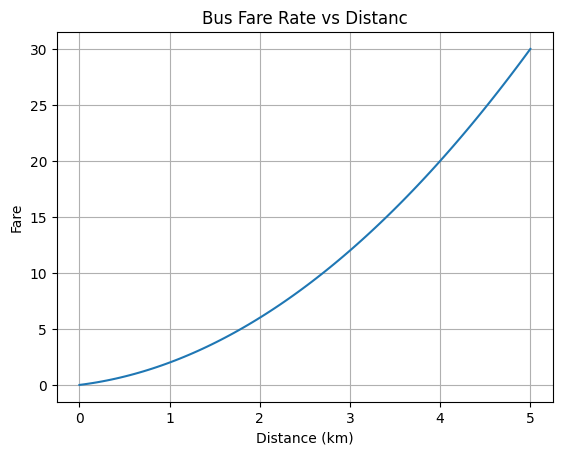

In [39]:
#plot
plt.figure()
plt.plot(distance, tot_fair_bus(distance))
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Bus Fare vs Distance')
plt.grid(True)
plt.show()

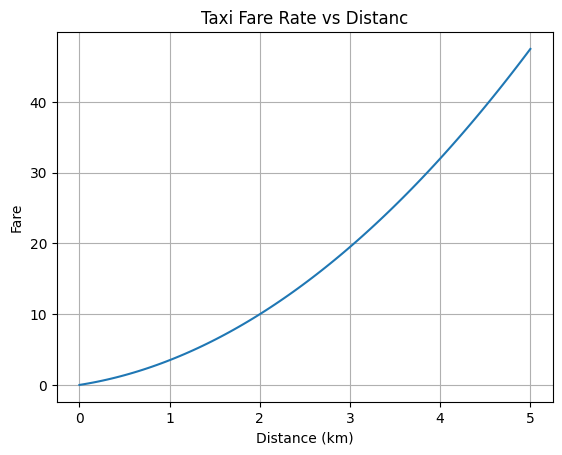

In [40]:
#plot
plt.figure()
plt.plot(distance, tot_fair_taxi(distance))
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Taxi Fare vs Distance')
plt.grid(True)
plt.show()

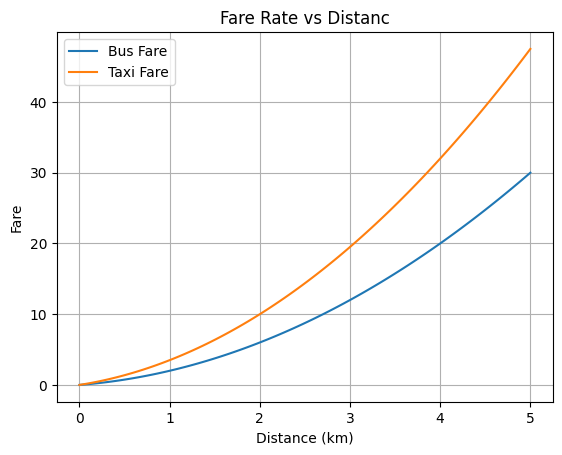

In [41]:
#plot
plt.figure()
plt.plot(distance, tot_fair_bus(distance),label='Bus Fare')
plt.plot(distance, tot_fair_taxi(distance),label='Taxi Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Fare Rate vs Distance')
plt.legend()
plt.grid(True)
plt.show()


##Part c - Interpretation

The fare rate function represents the cost per unit distance for each mode of travel. Therefore, the integration of this function over the interval (0,x) shows the total fare for traveling a distance of x kilometers in the respective mode of travel.

The bus fare rate is given by,


$$
(2t+1)
$$

The integrand of this function represents the total Bus fare for x km,


$$
F_b(x) = ∫_0^x (2t+1) dt = x^2 + x
$$
<br>
<br>

Similarly,
The Taxi fare rate is given by,

$$
(3t+2)
$$


The integrand of this function represents the total bus fare for x km,
$$
F_t(x) = ∫_0^x (3t+2) dt = \frac {3}{2} x^2 + 2x
$$


These intergrands were plotted against agains distance 0-5km to compare how travel cost increases with increasing distance.


Both integrands contain a quadratic term. Quadratic terms indicates that the fare does not increase at a constant rate, but it increases faster and faster as distance increases.

In the plot, the curve bending upward confirms this, there is an accelerating increase in the cost for both bus and taxi fare.

However, the taxi plot has a steeper curve. Which is explained by the coefficient for the quadratic terms in two functions,



*   Bus quadratic coefficient = 1
*   Taxi quadratic coefficient = 1.5

Accordingly, as the distance increases, Taxi curves upward more sharply and taxi fare grows faster than the bus fare.

Observing the plot, the gap between taxi and bus fares grow wider as the distance increases.

This proves that the quadratic value dominates as the distance increases, in each function.


When you look at the linear terms.

The linear terms for,

*   Bus = +x
*   Taxi = +2x

This means that at very small distances, the taxi fare starts rising as twicely as steeply as the bus fare, even before the quadratic term matters.

So taxi has both larger linear term and larger quadratic term.

$$
F_t(x) - F_b(x) = \frac {1}{2}x^2 + x
$$

There is a positive difference. And the difference increases as distance increases.

This concludes that, the longer the journey becomes, the more expensive taxi becomes compared to bus.


However, for short distance journeys the difference of fare is relatably smaller. While buses remain more affordable even for shorter distance rides, when speed, comfort and convience is prioritised considering the smaller extra cost, taxi can be more suitable than the bus for shorter distance journeys.







#Question 3 - Predicting Peak Travel Times Using Series Convergence

Passanger volume p(t) is modelled by:
$$
P(t) = 5 + 4\sin(\pi t) - \frac {3}{2} t^2 + \frac {t^4}{4} + ..., t \in [0,24]
$$

In [10]:
#Setting time range
t_hrs=np.linspace(0,24,1000)

# Approximating first 4 terms of the passanger volume function
P_t = 5 + (4*np.sin(np.pi * t_hrs))- ((3/2)*t_hrs**2)+((t_hrs**4/4))


[ 5.00000000e+00  5.30074261e+00  5.59803770e+00  5.89018080e+00
  6.17548898e+00  6.45231036e+00  6.71903367e+00  6.97409737e+00
  7.21599869e+00  7.44330219e+00  7.65464807e+00  7.84875998e+00
  8.02445240e+00  8.18063752e+00  8.31633156e+00  8.43066049e+00
  8.52286521e+00  8.59230598e+00  8.63846629e+00  8.66095594e+00
  8.65951351e+00  8.63400801e+00  8.58443990e+00  8.51094127e+00
  8.41377537e+00  8.29333533e+00  8.15014225e+00  7.98484243e+00
  7.79820406e+00  7.59111310e+00  7.36456854e+00  7.11967709e+00
  6.85764717e+00  6.57978236e+00  6.28747442e+00  5.98219563e+00
  5.66549086e+00  5.33896916e+00  5.00429496e+00  4.66317905e+00
  4.31736926e+00  3.96864094e+00  3.61878728e+00  3.26960962e+00
  2.92290760e+00  2.58046944e+00  2.24406222e+00  1.91542238e+00
  1.59624629e+00  1.28818115e+00  9.92816166e-01  7.11674015e-01
  4.46202774e-01  1.97768235e-01 -3.23532842e-02 -2.42981610e-01
 -4.33038820e-01 -6.01554764e-01 -7.47671953e-01 -8.70649802e-01
 -9.69868187e-01 -1.04483

##Part a

##Part b

##Part c

#Question 4

##Part a

##Part b

##Part c

#Question 5

##Part a

##Part b

##Part c

##Part d